In [2]:
# Masoud Pourghavam
# Student Number: 810601044
# Course: Artificial Intelligence
# University of Tehran
# Homework 5 MLP

In [3]:
# Import the neccessary modules
import numpy as np 
import pandas as pd 
import keras
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
from keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential

In [4]:
My_path = r'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark'

data = []

labels = []

classes = 43

# Configuration of images
for i in range(classes):
    path = os.path.join(My_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30)) # Resize the images
            image = np.array(image)
            data.append([image,i]) # Append the values together 

In [5]:
random.shuffle(data)
print(len(data))

39209


In [6]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

In [7]:
#Converting lists into numpy arrays
x = np.array(x)
y = np.array(y)

In [8]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=42)

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Train set shape: (35288, 30, 30, 3)
Validation set shape: (3921, 30, 30, 3)


In [9]:
X_train = X_train/255.0
X_val = X_val/255.0

print("Shape of train images is:", X_train.shape)
print("Shape of labels is:", y_train.shape)

Shape of train images is: (35288, 30, 30, 3)
Shape of labels is: (35288,)


In [10]:
# Define the MLP model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))  # Flatten the input shape excluding the batch dimension

# Add hidden layers
model.add(Dense(256, activation='relu'))  # Example hidden layer with 256 neurons
model.add(Dense(128, activation='relu'))  # Another hidden layer with 128 neurons

# Add output layer
model.add(Dense(classes, activation='softmax'))  # Output layer with 'classes' neurons for classification

# Compile the model with specified learning rate
learning_rate= 0.001
optimizer = keras.optimizers.Adam(learning_rate = learning_rate, clipvalue = 1.0)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2700)              0         
                                                                 
 dense (Dense)               (None, 256)               691456    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 43)                5547      
                                                                 
Total params: 729,899
Trainable params: 729,899
Non-trainable params: 0
_________________________________________________________________


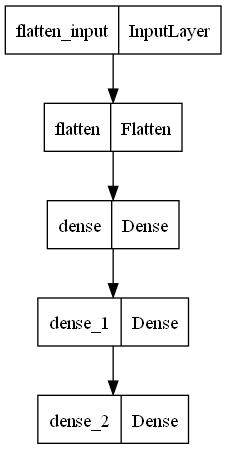

In [11]:
# The model visualization
keras.utils.plot_model(model)

In [36]:
# Train the model
batch_size = 32
epochs = 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/20
1103/1103 [==============================] - 9s 8ms/step - loss: 1.7340 - accuracy: 0.5476 - val_loss: 0.9557 - val_accuracy: 0.7488
Epoch 2/20
1103/1103 [==============================] - 8s 7ms/step - loss: 0.6896 - accuracy: 0.8123 - val_loss: 0.5762 - val_accuracy: 0.8398
Epoch 3/20
1103/1103 [==============================] - 8s 7ms/step - loss: 0.4937 - accuracy: 0.8655 - val_loss: 0.4059 - val_accuracy: 0.8939
Epoch 4/20
1103/1103 [==============================] - 8s 7ms/step - loss: 0.4153 - accuracy: 0.8863 - val_loss: 0.4180 - val_accuracy: 0.8873
Epoch 5/20
1103/1103 [==============================] - 8s 7ms/step - loss: 0.3493 - accuracy: 0.9038 - val_loss: 0.3903 - val_accuracy: 0.8919
Epoch 6/20
1103/1103 [==============================] - 8s 7ms/step - loss: 0.3174 - accuracy: 0.9127 - val_loss: 0.2925 - val_accuracy: 0.9214
Epoch 7/20
1103/1103 [==============================] - 8s 7ms/step - loss: 0.2817 - accuracy: 0.9229 - val_loss: 0.3600 - val_accuracy:

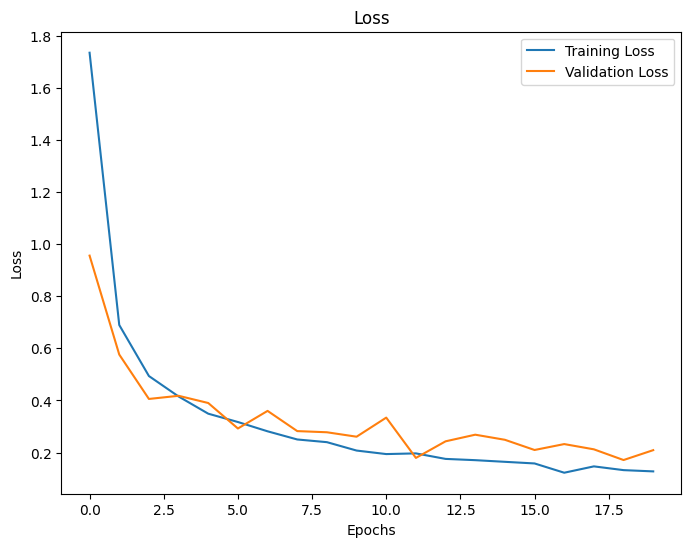

In [37]:
# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

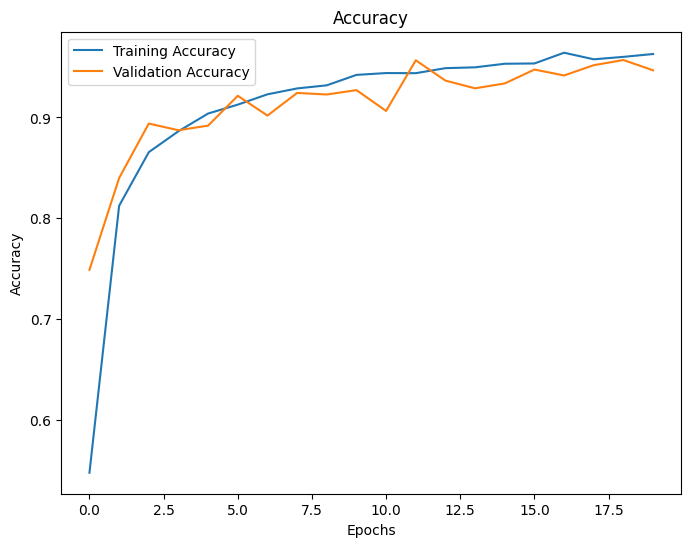

In [38]:
# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred = np.argmax(model.predict(X_test), axis=-1)

# Get predictions for validation data
val_pred = np.argmax(model.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_pred = accuracy_score(labels, test_pred)
print("Accuracy on the test dataset:", accuracy_test_pred)

# Calculate accuracy for validation
accuracy_val_pred = accuracy_score(y_val, val_pred)
print("Accuracy on the validation dataset:", accuracy_val_pred)

# Calculate loss for test
loss_test = model.evaluate(X_test, labels)
print("Loss on the test dataset:", loss_test)

# Calculate loss for validation
loss_val = model.evaluate(X_val, y_val)
print("Loss on the validation dataset:", loss_val)

123/123 [==============================] - 0s 3ms/step
Accuracy on the test dataset: 0.8345209817893904
Accuracy on the validation dataset: 0.9466972711043101
395/395 [==============================] - 2s 4ms/step - loss: 1.1299 - accuracy: 0.8345
Loss on the test dataset: [1.129865050315857, 0.8345209956169128]
123/123 [==============================] - 1s 4ms/step - loss: 0.2094 - accuracy: 0.9467
Loss on the validation dataset: [0.20944927632808685, 0.9466972947120667]


In [40]:
# Create confusion matrix for validation data
val_cm = confusion_matrix(y_val, val_pred)

# Create confusion matrix for test data
test_cm = confusion_matrix(labels, test_pred)

print("Confusion matrix for validation data:")
print(val_cm)
print()

print("Confusion matrix for test data:")
print(test_cm)

Confusion matrix for validation data:
[[ 13   3   0 ...   0   0   0]
 [  0 203   6 ...   0   0   0]
 [  0   1 213 ...   0   0   0]
 ...
 [  0   0   1 ...  50   0   0]
 [  0   0   0 ...   0  24   0]
 [  0   0   0 ...   0   0  28]]

Confusion matrix for test data:
[[ 21  27   2 ...   0   0   0]
 [  1 560  90 ...   0   0   0]
 [  0  12 688 ...   0   0   0]
 ...
 [  0   0   0 ...  42   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0   5  73]]
